# Tercer Archivo
En este ultimo archivo se realiza el Modelo predictivo y predicción pedida por el cliente

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
data = pd.read_csv(r"./DataSet_P.csv")

In [3]:
data.columns

Index(['Unnamed: 0', 'property_type', 'l2', 'lat', 'lon', 'bathrooms',
       'bedrooms', 'price', 'target'],
      dtype='object')

In [4]:
X = data[['property_type', 'l2', 'lat', 'lon', 'bathrooms',
       'bedrooms']]  #Datos para el modelo                                                  
y = data.target # Etiqueta a predecir

## Árbol de decisión

Ahora que tenemos nuestras variables predictoras `X`, por un lado, y nuestra varible a predecir `y`, por el otro, vamos a crear un modelo de árbol de decisión.

In [6]:
from sklearn.tree import DecisionTreeClassifier
# Instanciamos un objeto de la clase DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 20, random_state = 42) 
#La profundidad del mismo (max_depth) se decide mas abajo en el código

In [7]:
clf.fit(X.values,y.values)

DecisionTreeClassifier(max_depth=20, random_state=42)

In [8]:
#Probamos el modelo
y_pred = clf.predict(X.values)

In [9]:
#Vemos que tenemos un buen Accurancy
from sklearn.metrics import accuracy_score
print(accuracy_score(y,y_pred))

0.9603916904321029


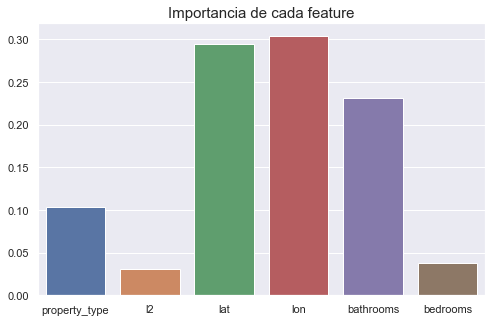

In [10]:
# Ploteamos la importancia de los atributos elegidos a la hora de hacer la predicción
plt.figure(figsize = (8,5))
importances = clf.feature_importances_
columns = X.columns
sns.barplot(x = columns, y = importances)
plt.title('Importancia de cada feature', fontsize = 15)
plt.show()

La importancia de los features que poseen muchos faltantes es un problema para estas predicciones. Pero se puede mejorar posteriormente optimizando los datos por medio de la descripción de las propiedades

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from IPython.display import clear_output

Estudiamos diferentes tipos de max_depth para definir cual es el mejor valor que podemos utilizar para este hyperparameter

In [12]:
#Guardamos en listas las posibilidades diferentes que tenemos en medida de que parte del dataset tomamos como entrenamiento y cual de test
tree_train_scores_mean = []
tree_train_scores_std = []

profundidades = np.arange(1,60,1)
i = 0
i_max = len(profundidades)
for profundidad in profundidades:
    i = i + 1
    clf2 = DecisionTreeClassifier(max_depth=profundidad)
    #validación cruzada en el árbol de decision
    #cv = indica en la cantidad de partes que sera dividido el dataset
    tree_scores = cross_validate(clf2, X, y, cv=5, return_train_score=True, n_jobs = -1)
    
    tree_train_scores_mean.append(tree_scores['train_score'].mean())
    tree_train_scores_std.append(tree_scores['train_score'].std())
    
    clear_output(wait=True)
    print('Completado: ' + str(round(i / i_max * 100, 2)) + '%')

tree_train_scores_mean = np.array(tree_train_scores_mean)
tree_train_scores_std = np.array(tree_train_scores_std)

Completado: 100.0%


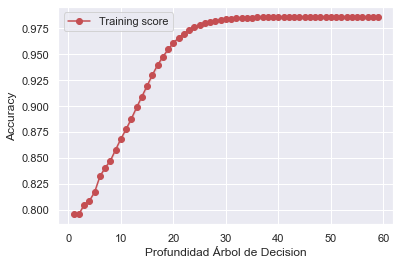

In [13]:
plt.fill_between(profundidades, tree_train_scores_mean - tree_train_scores_std,
                 tree_train_scores_mean + tree_train_scores_std, alpha=0.1,
                 color="r")
plt.plot(profundidades, tree_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Profundidad Árbol de Decision')
plt.show()

Podríamos definir un valor optimo en los 30 sin embargo utilizaremos 20, por medio de pruebas no observamos diferencias considerables en la predicción del set de testeo y disminuimos el riesgo de que nuestro modelo tenga overfitting 

## Realización de la predicción

In [14]:
#probamos el árbol de decision en el test
test_df = pd.read_csv("./test_P.csv")

In [15]:
X_test = test_df[['property_type', 'l2', 'lat', 'lon', 'bathrooms',
       'bedrooms']]
y_pred_test = clf.predict(X_test.values)
    

In [16]:
y_pred_test

array([0, 0, 0, ..., 0, 0, 0])

In [17]:
#Transformamos el resultado en un DataFrame para su entrega
pred = pd.DataFrame(y_pred_test, columns=["pred"])

In [18]:
#Creamos un archivo CSV sin indice para el cliente
pred.to_csv("Matias-Harper.csv", index=False)